In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прогнозирование выживаемости пациентов с циррозом печени
1. ID	- Id пациента
2. N_Days - количество дней между регистрацией и более ранним из следующих событий: смерть, трансплантация или время анализа исследования в июле 1986 г.
3. Status - статус пациента C (censored), CL (censored due to liver tx), or D (death) (целевой признак)
4. Drug - приминаемое лекарство
5. Age	- возвраст в днях
6. Sex	- пол (m/f)
7. Ascites - наличие асцита (y/n)
8. Hepatomegaly - наличие гепатомегалии (y/n)
9. Spiders	- паучья болезнь (y/n)
10. Edema - наличие отека N (отсутствие отека и отсутствие диуретической терапии отека), S (отек присутствует без диуретиков или отек устраняется диуретиками) или Y (отек, несмотря на диуретическую терапию)
11. Bilirubin - уровень билирубина в крови
12. Cholesterol - уровень холестерина
13. Albumin - уровень альбумина
14. Copper - медь в моче
15. Alk_Phos - щелочная фосфатаза
16. SGOT - внутриклеточный фермент
17. Tryglicerides - количество триглицеридов
18. Platelets - количество тромбоцитов на кубический
19. Prothrombin - протромбиновое время
20. Stage - гистологическая стадия заболевания (1, 2, 3 или 4)

In [2]:
#Загружаем данные в датафрейм
cirrhos = pd.read_csv('cirrhosis.csv')

#Выводим статистическую информацию
print(cirrhos.describe())


               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

In [3]:

cirrhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [4]:
cirrhos.drop(columns=['ID'], inplace=True)
cirrhos.dropna(inplace=True)
print(cirrhos)

     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
307    1153      C  D-penicillamine  22347   F       N            Y       N   
308     994      C          Placebo  21294   F       N            N       N   
309     939      C  D-penicillamine  22767   F       N            N       N   
310     839      C  D-penicillamine  13879   F       N            N       N   
311     788      C          Placebo  12109   F       N            N       Y   

    Edema  Bilirubin  Cholesterol  Albumin  Copper 

In [5]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Status', 'Drug', 'Sex','Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cirrhos['Age']=cirrhos['Age']/365
# Используем LabelEncoder для замены категориальных данных
for column in categorical_columns:
    le = LabelEncoder()
    cirrhos[column] = le.fit_transform(cirrhos[column])
print(cirrhos)

     N_Days  Status  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  \
0       400       2     0  58.805479    0        1             1        1   
1      4500       0     0  56.484932    0        0             1        1   
2      1012       2     0  70.120548    1        0             0        0   
3      1925       2     0  54.778082    0        0             1        1   
4      1504       1     1  38.131507    0        0             1        1   
..      ...     ...   ...        ...  ...      ...           ...      ...   
307    1153       0     0  61.224658    0        0             1        0   
308     994       0     1  58.339726    0        0             0        0   
309     939       0     0  62.375342    0        0             0        0   
310     839       0     0  38.024658    0        0             0        0   
311     788       0     1  33.175342    0        0             0        1   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0 

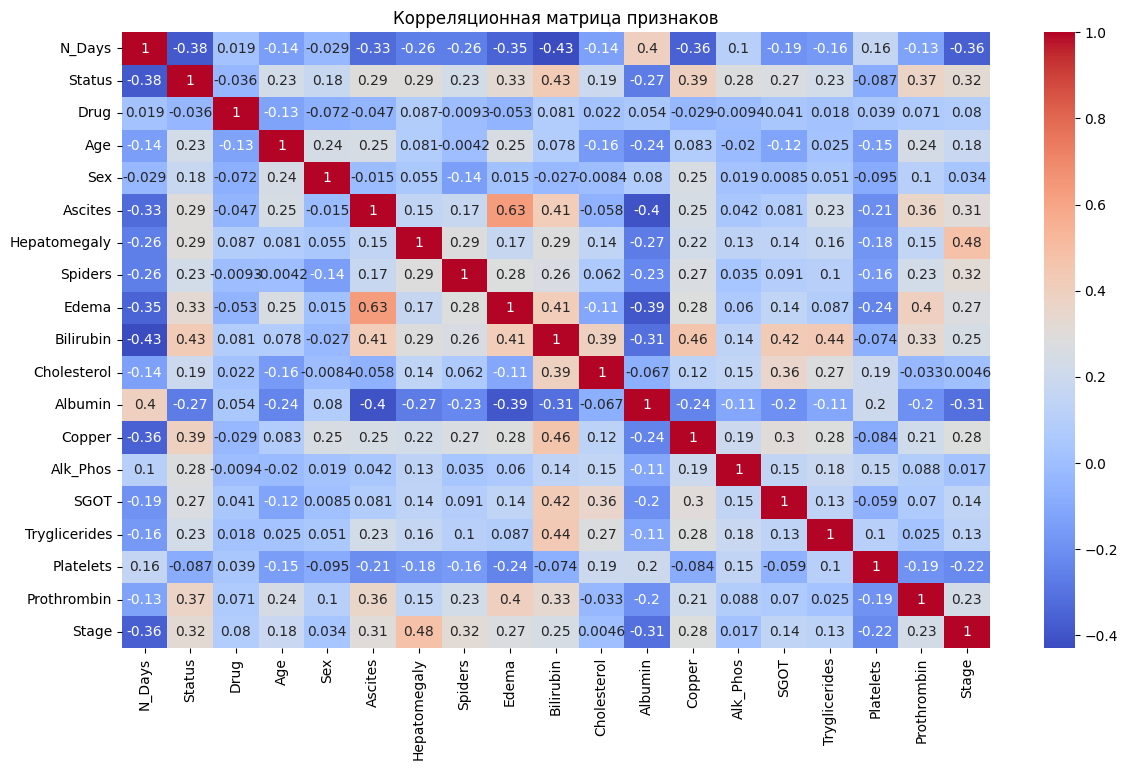

In [6]:
plt.figure(figsize=(14, 8))
correlation = cirrhos.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

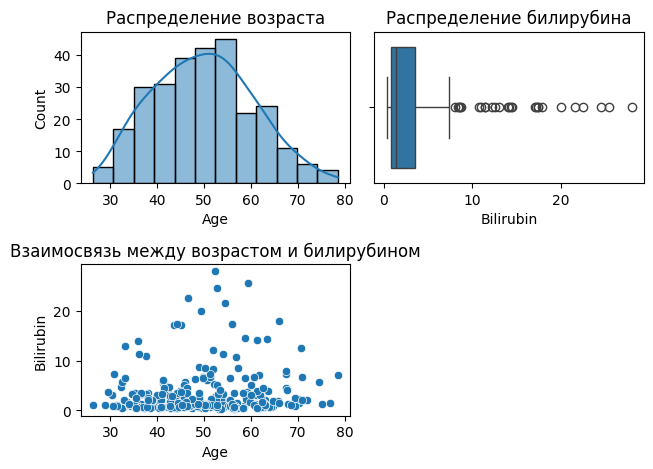

In [7]:
plt.subplot(2, 2, 1)
sns.histplot(cirrhos['Age'], kde=True)
plt.title('Распределение возраста')

# Пример 2: Boxplot для 'Bilirubin'
plt.subplot(2, 2, 2)
sns.boxplot(x=cirrhos['Bilirubin'])
plt.title('Распределение билирубина')

# Пример 3: Взаимвосвязь 'Age' vs 'Bilirubin'
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Bilirubin', data=cirrhos)
plt.title('Взаимосвязь между возрастом и билирубином')

plt.tight_layout()
plt.show()

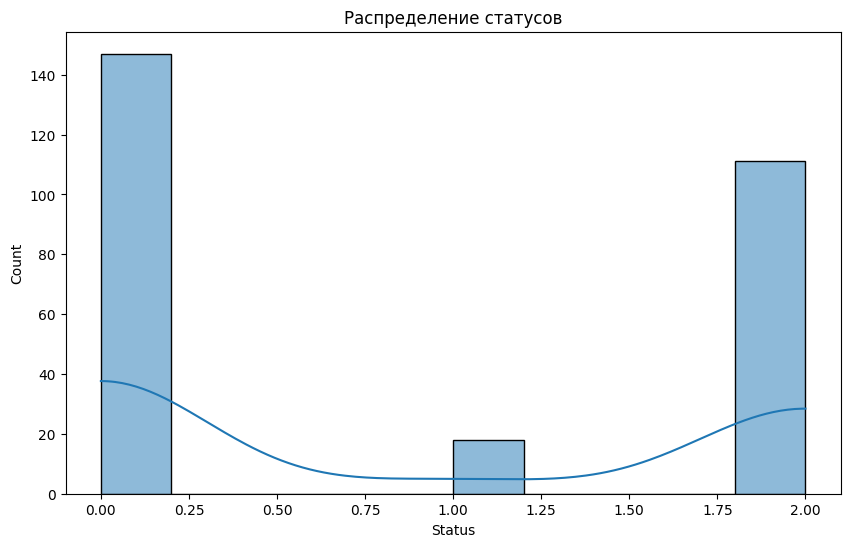

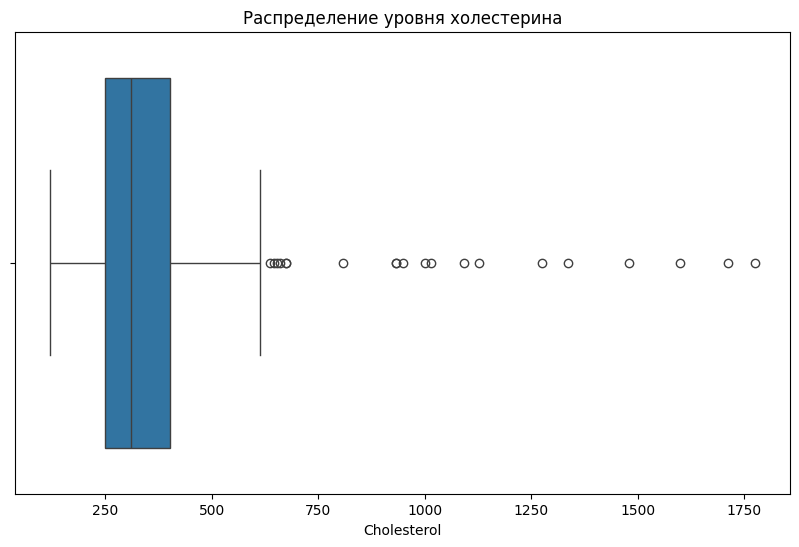

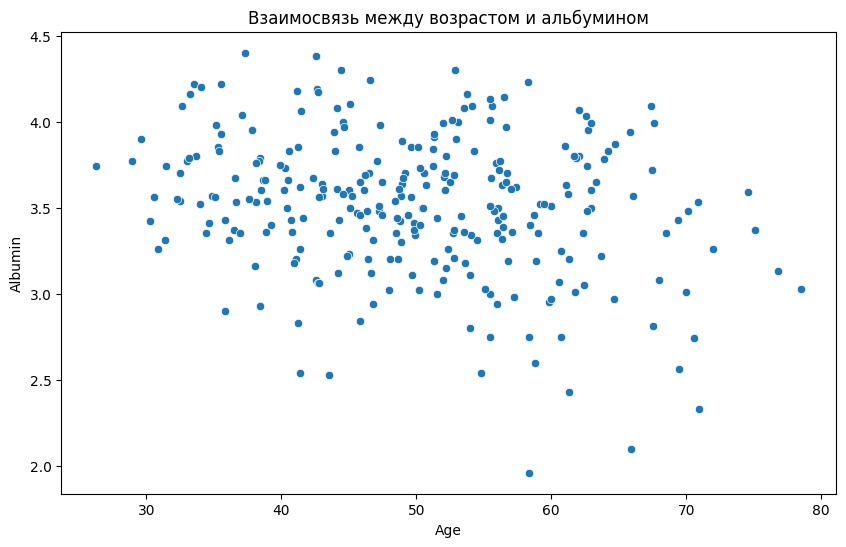

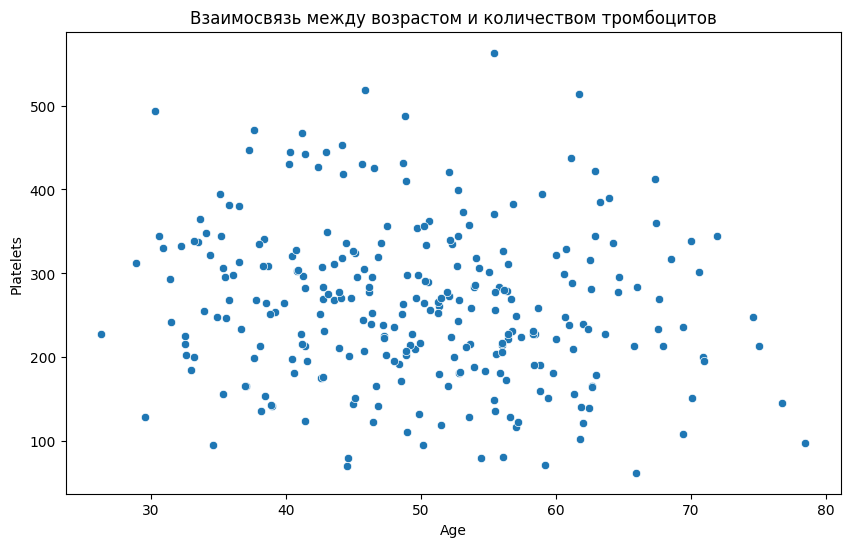

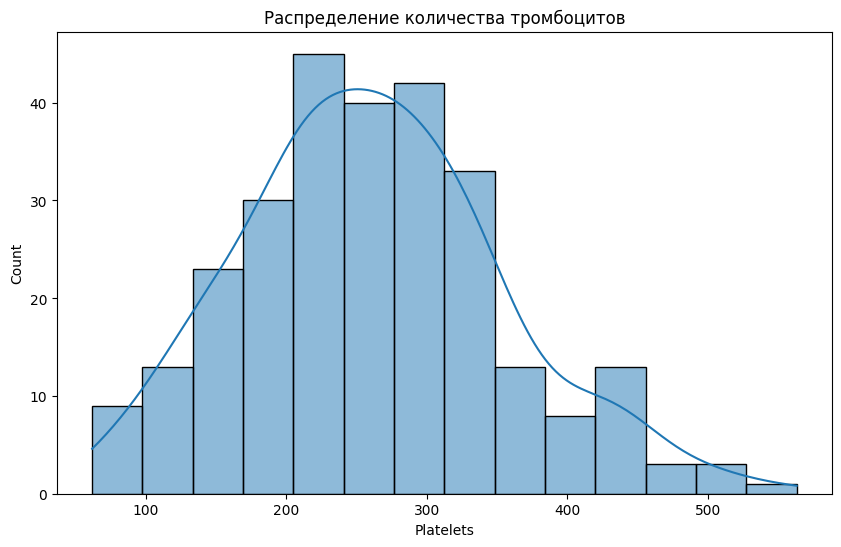

In [8]:
# Пример 5: Гистограмма для 'Status'
plt.figure(figsize=(10, 6))
sns.histplot(cirrhos['Status'], kde=True)
plt.title('Распределение статусов')

# Пример 6: Boxplot для 'Cholesterol'
plt.figure(figsize=(10, 6))
sns.boxplot(x=cirrhos['Cholesterol'])
plt.title('Распределение уровня холестерина')

# Пример 7: Scatter plot для 'Age' и 'Albumin'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Albumin', data=cirrhos)
plt.title('Взаимосвязь между возрастом и альбумином')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Platelets', data=cirrhos)
plt.title('Взаимосвязь между возрастом и количеством тромбоцитов')

# Пример 8: Гистограмма для 'Platelets'
plt.figure(figsize=(10, 6))
sns.histplot(cirrhos['Platelets'], kde=True)
plt.title('Распределение количества тромбоцитов')

plt.show()

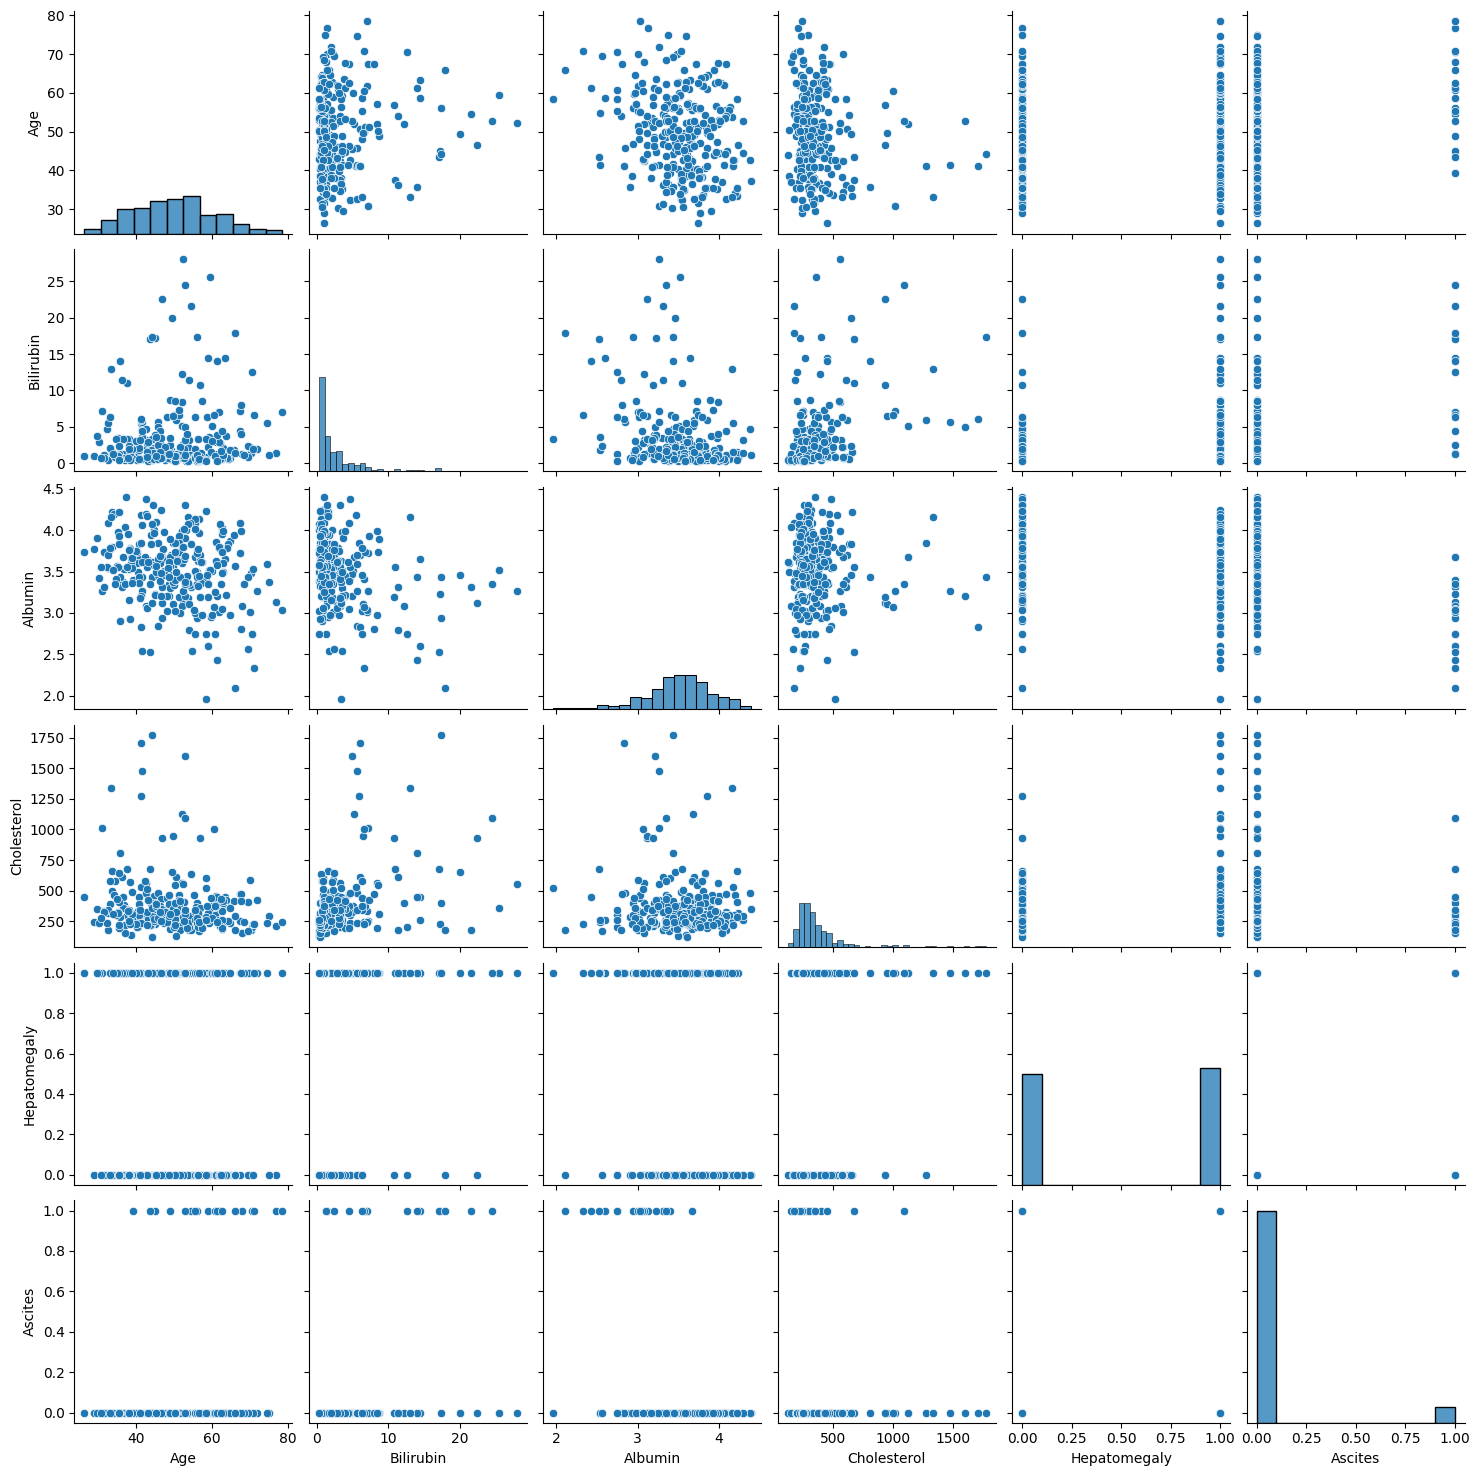

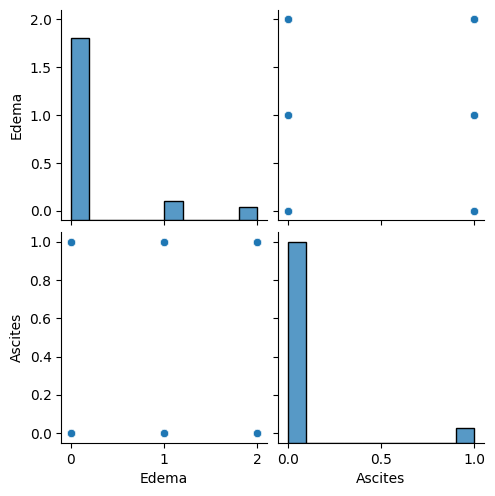

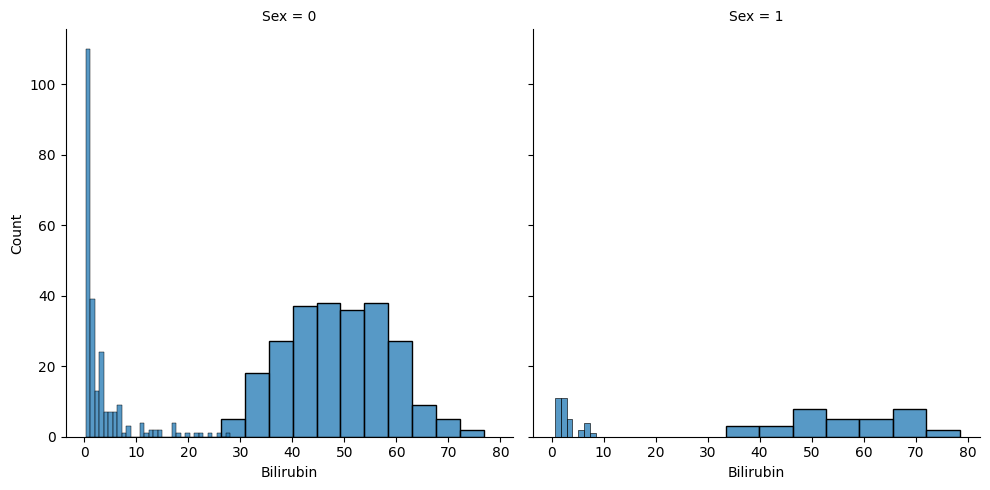

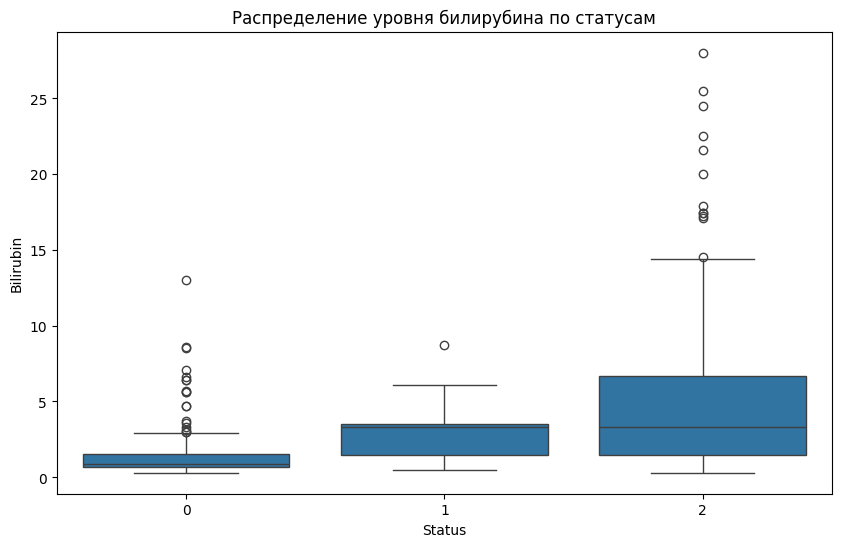

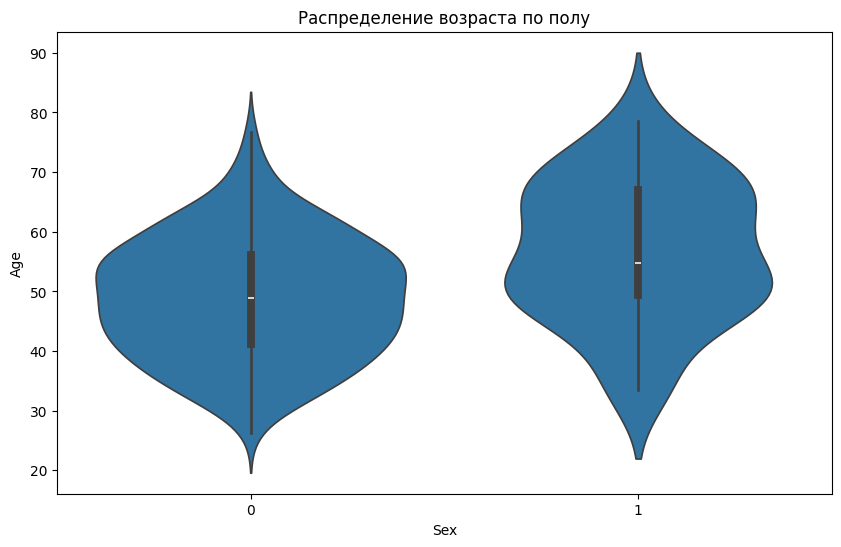

In [9]:
# Pairplot для числовых признаков (групповая визуализация)
sns.pairplot(cirrhos[['Age', 'Bilirubin', 'Albumin', 'Cholesterol','Hepatomegaly','Ascites']])
plt.title('')
plt.show()

sns.pairplot(cirrhos[['Edema','Ascites']])
plt.title('')
plt.show()

# FacetGrid для группировки по 'Sex' и визуализации распределения 'Age' и 'Bilirubin'
g = sns.FacetGrid(cirrhos, col="Sex", height=5)
g.map(sns.histplot, "Age")
g.map(sns.histplot, "Bilirubin")
plt.show()

# Boxplot для распределения 'Bilirubin' в зависимости от 'Status'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Bilirubin', data=cirrhos)
plt.title('Распределение уровня билирубина по статусам')
plt.show()

# Violin plot для распределения 'Age' в зависимости от 'Sex'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=cirrhos)
plt.title('Распределение возраста по полу')
plt.show()


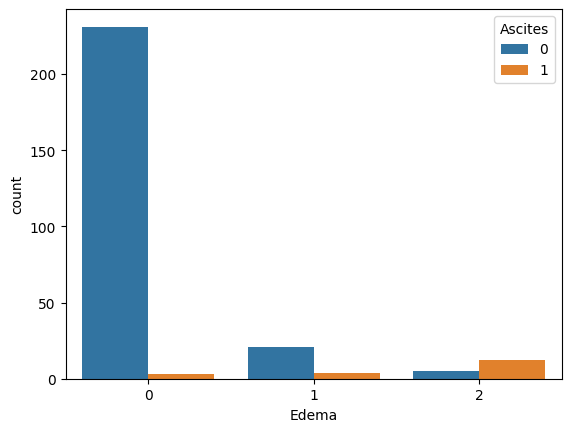

In [10]:
sns.countplot(data=cirrhos, x="Edema", hue='Ascites');

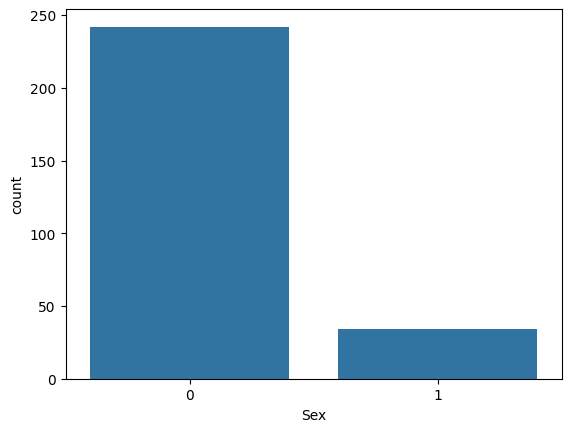

In [11]:
sns.countplot(data=cirrhos, x="Sex");

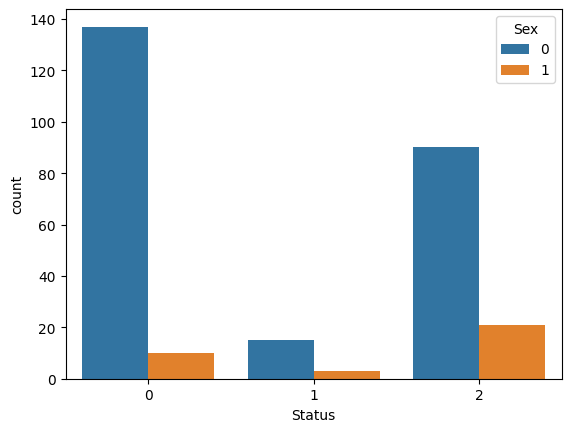

In [12]:
sns.countplot(data=cirrhos, x="Status", hue='Sex');

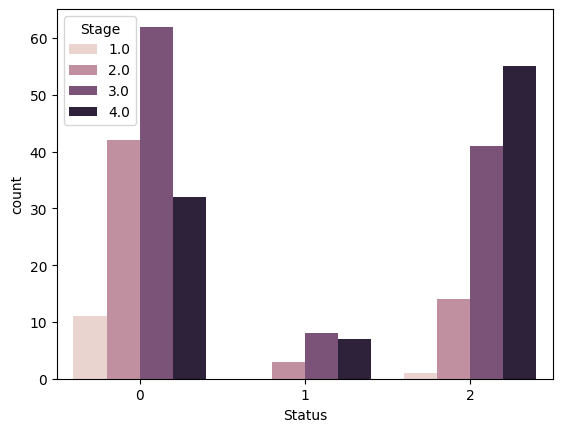

In [13]:
sns.countplot(data=cirrhos, x="Status", hue='Stage');

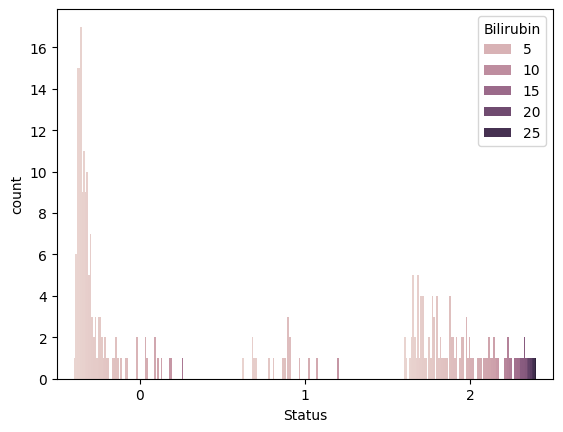

In [14]:
sns.countplot(data=cirrhos, x="Status", hue='Bilirubin');

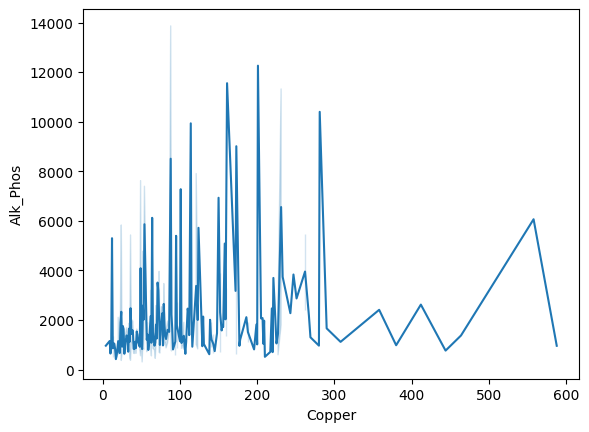

In [15]:
sns.lineplot(data=cirrhos, x='Copper', y='Alk_Phos');

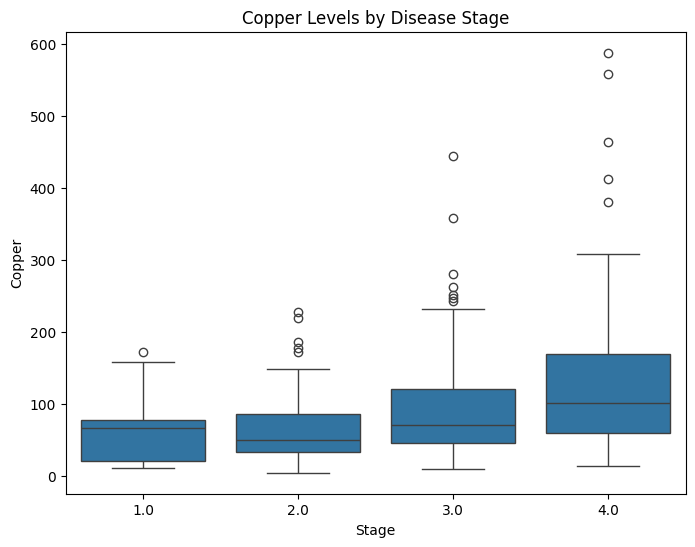

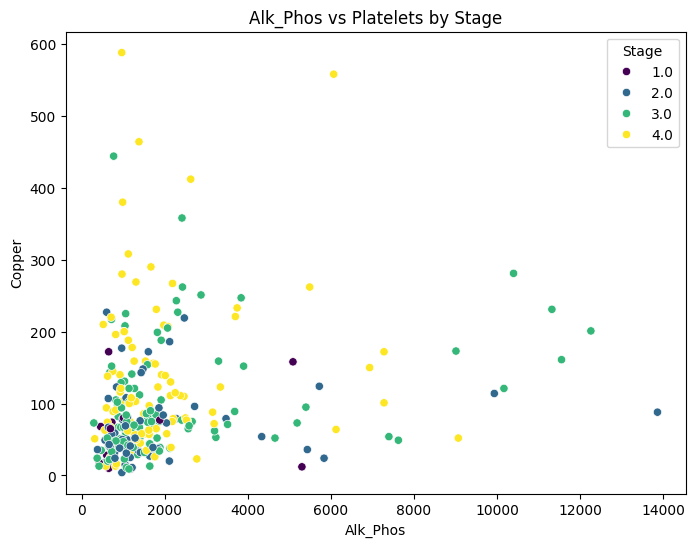

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Copper', data=cirrhos)
plt.title('Copper Levels by Disease Stage')
plt.show()

# 3. Диаграмма рассеяния для взаимосвязи между щелочной фосфатазой и тромбоцитами
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alk_Phos', y='Copper', hue='Stage', palette='viridis', data=cirrhos)
plt.title('Alk_Phos vs Platelets by Stage')
plt.show()
